# Dataset

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data

Problematic : How can we optimize the exam score

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# EDA

### Basic info

In [2]:
# Load file
df = pd.read_csv('student_habits_performance.csv')
df.drop('student_id', axis=1, inplace=True)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Check Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [4]:
df['age'].max()

24

In [5]:
df.isna().sum()

age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


### Plots

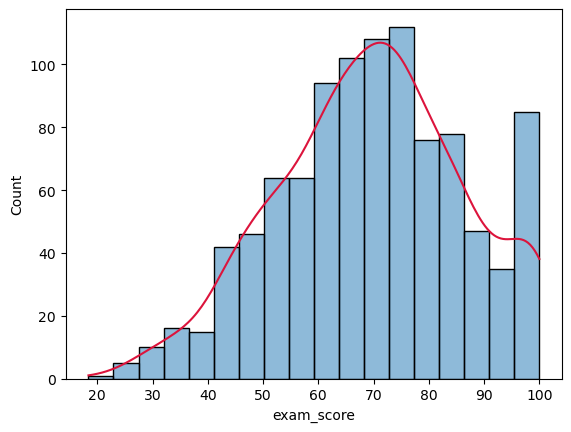

In [7]:
plot= sns.histplot(df['exam_score'], kde=True)
plot.lines[0].set_color('crimson')


<Axes: xlabel='study_hours_per_day', ylabel='Count'>

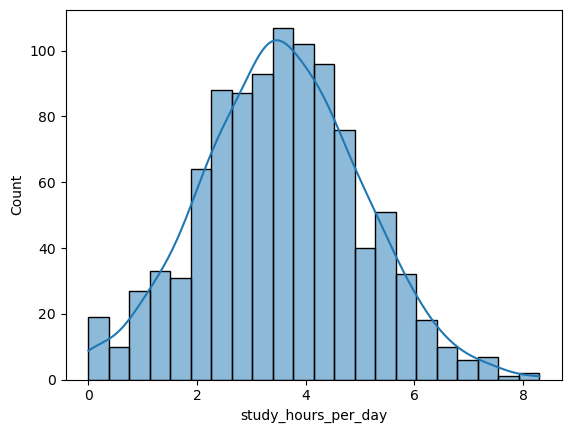

In [8]:
sns.histplot(df['study_hours_per_day'], kde=True)

<Axes: xlabel='sleep_hours', ylabel='Count'>

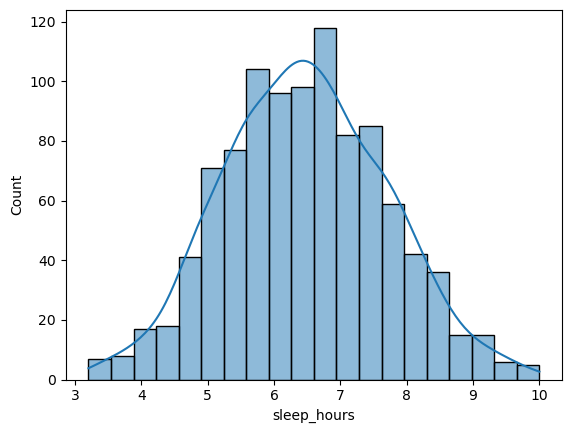

In [9]:
sns.histplot(df['sleep_hours'], kde=True)

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

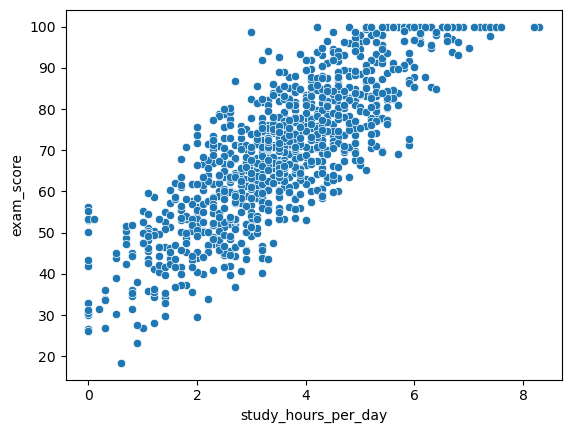

In [10]:
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')

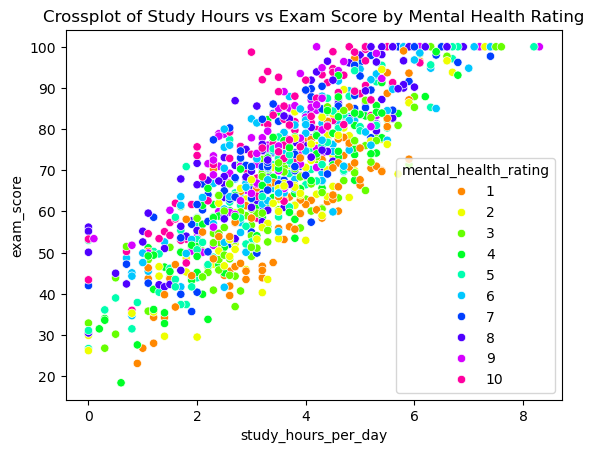

In [11]:
# Create a 10-color palette (e.g., "viridis", "Set1", "tab10", "hls", or a custom list)
palette = sns.color_palette("hsv", 10)  # or "tab10", "Spectral", etc.


# Map the mental_health_rating values (1–10) to the palette
rating_colors = {rating: color for rating, color in zip(range(1, 11), palette)}

sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='mental_health_rating', palette=rating_colors)
plt.title('Crossplot of Study Hours vs Exam Score by Mental Health Rating')
plt.show()

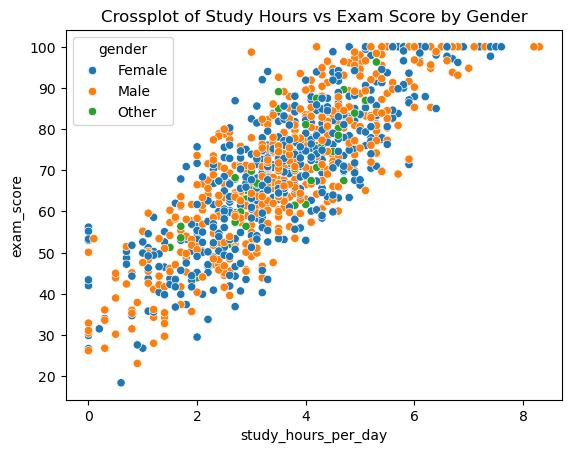

In [12]:
# Map Study hours vs Exam score by Gender

sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title('Crossplot of Study Hours vs Exam Score by Gender')
plt.show()

<Axes: xlabel='social_media_hours', ylabel='exam_score'>

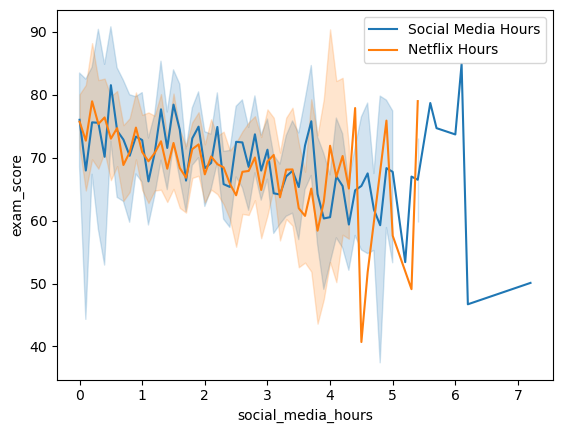

In [13]:
sns.lineplot(data=df, x='social_media_hours', y='exam_score', label='Social Media Hours')
sns.lineplot(data=df, x='netflix_hours', y='exam_score', label='Netflix Hours')

In [14]:
# Merge social media hours and netflix hours
df["Media_hours"] = df['netflix_hours'] + df['social_media_hours']

df = df.drop('netflix_hours', axis=1)
df = df.drop('social_media_hours', axis=1)

<Axes: xlabel='Media_hours', ylabel='exam_score'>

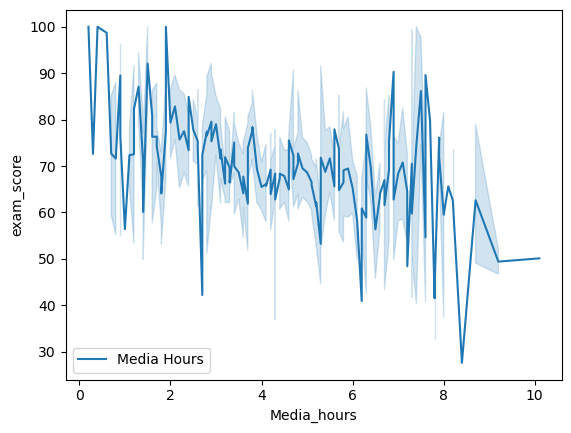

In [15]:
sns.lineplot(data=df, x='Media_hours', y='exam_score', label='Media Hours')

In [16]:
df.head()

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,Media_hours
0,23,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3
1,20,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1
2,21,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4
3,23,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9
4,19,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9


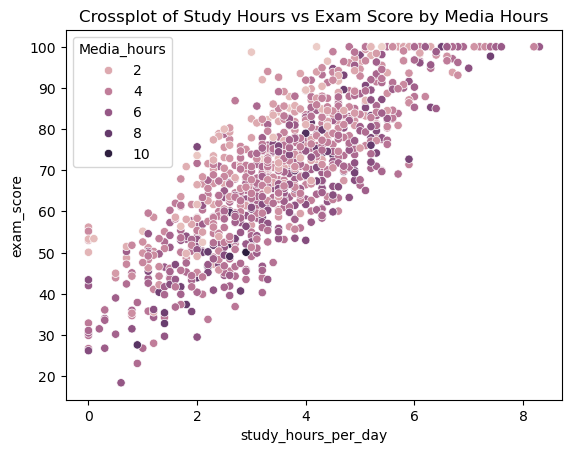

In [17]:
# Map Study hours vs Exam score by Media hours

sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='Media_hours')
plt.title('Crossplot of Study Hours vs Exam Score by Media Hours')
plt.show()

<Axes: xlabel='mental_health_rating', ylabel='exam_score'>

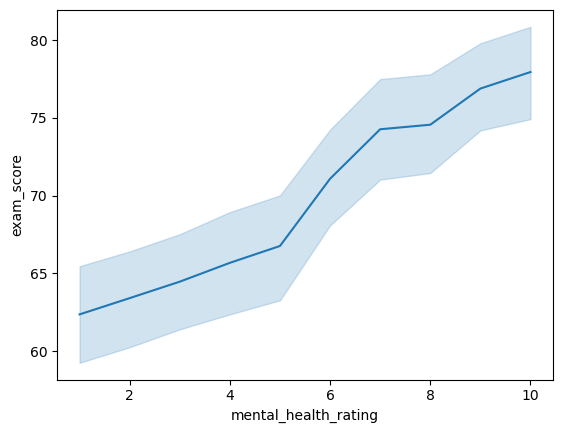

In [18]:
sns.lineplot(data=df, x='mental_health_rating', y='exam_score')

<Axes: xlabel='Media_hours', ylabel='exam_score'>

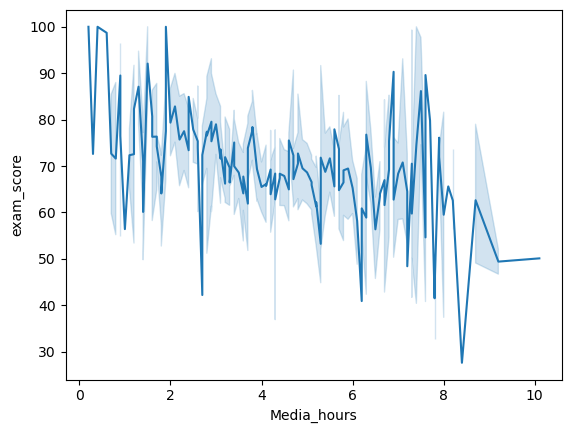

In [19]:
sns.lineplot(data=df, x='Media_hours', y='exam_score')

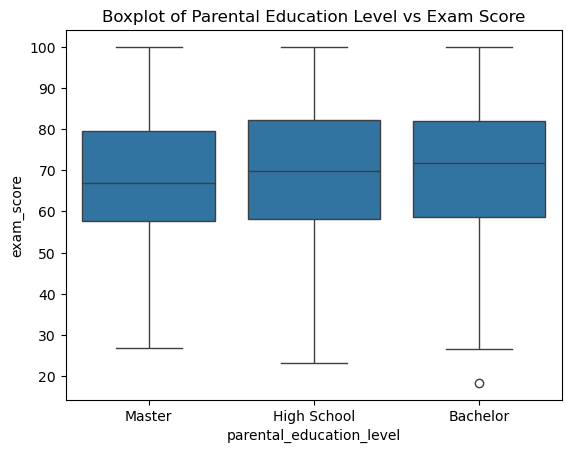

In [20]:
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Boxplot of Parental Education Level vs Exam Score')
plt.show()

<Axes: xlabel='part_time_job', ylabel='exam_score'>

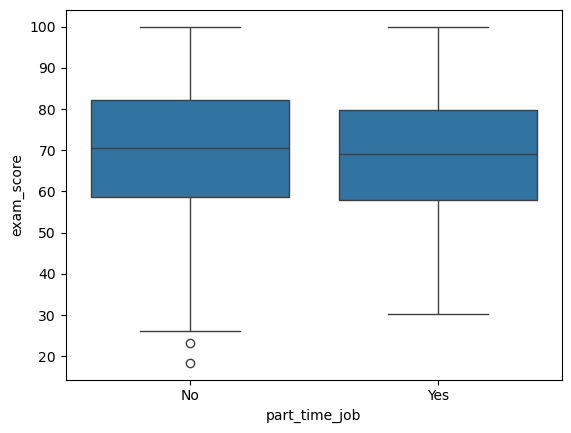

In [21]:
sns.boxplot(data=df, x='part_time_job', y='exam_score')

<Axes: xlabel='exercise_frequency', ylabel='exam_score'>

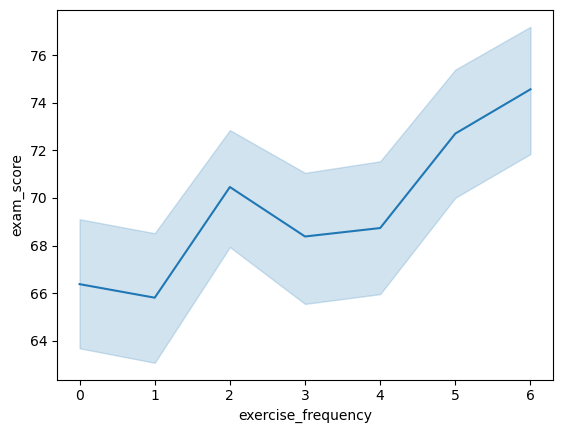

In [22]:
sns.lineplot(data=df, x='exercise_frequency', y='exam_score')

<Axes: xlabel='diet_quality', ylabel='mental_health_rating'>

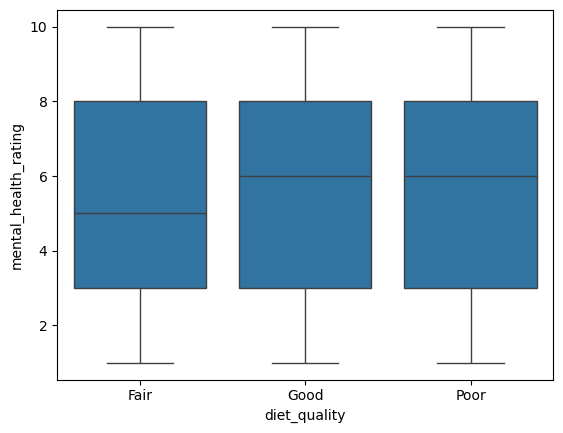

In [23]:
sns.boxplot(data=df, x=df['diet_quality'], y=('mental_health_rating'))

<Axes: xlabel='Media_hours', ylabel='sleep_hours'>

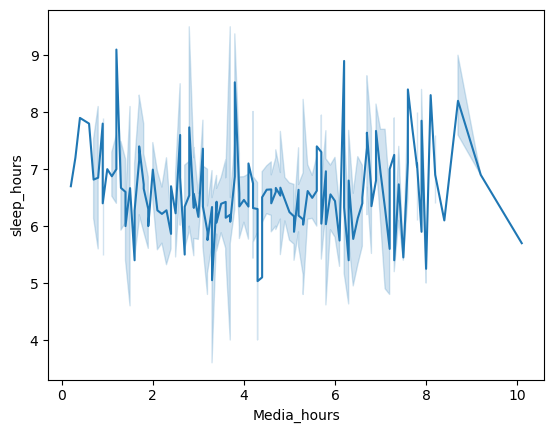

In [24]:
sns.lineplot(data=df, x=df['Media_hours'], y=df['sleep_hours'])

<Axes: xlabel='gender', ylabel='study_hours_per_day'>

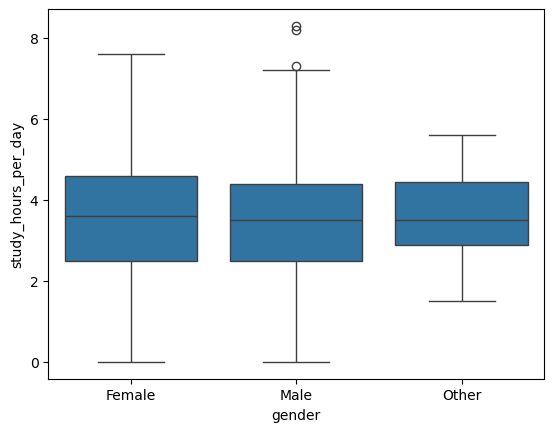

In [25]:
sns.boxplot(data=df, x=df['gender'], y=df['study_hours_per_day'])

<Axes: xlabel='part_time_job', ylabel='exam_score'>

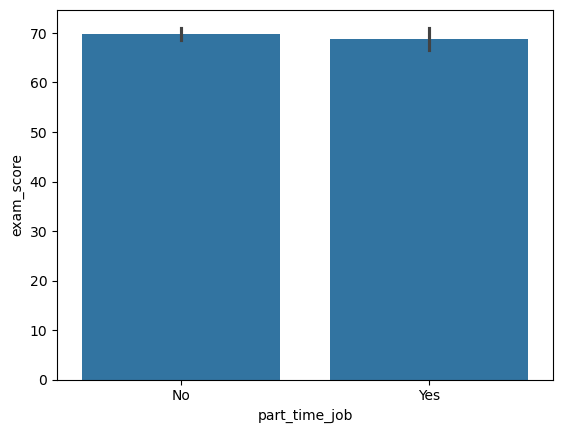

In [26]:
sns.barplot(data=df, x='part_time_job', y='exam_score')

<Axes: xlabel='attendance_percentage', ylabel='exam_score'>

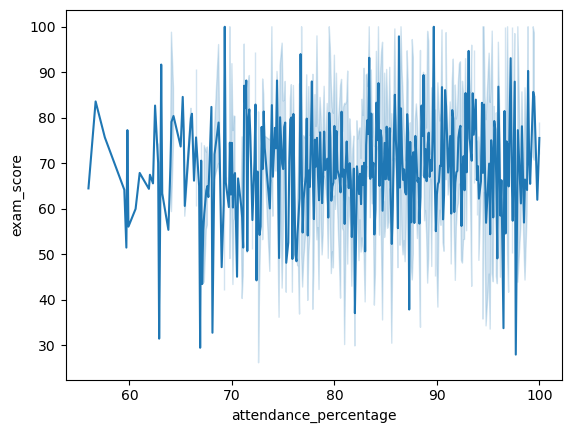

In [27]:
sns.lineplot(data=df, x='attendance_percentage', y='exam_score')

<Axes: xlabel='sleep_hours', ylabel='exam_score'>

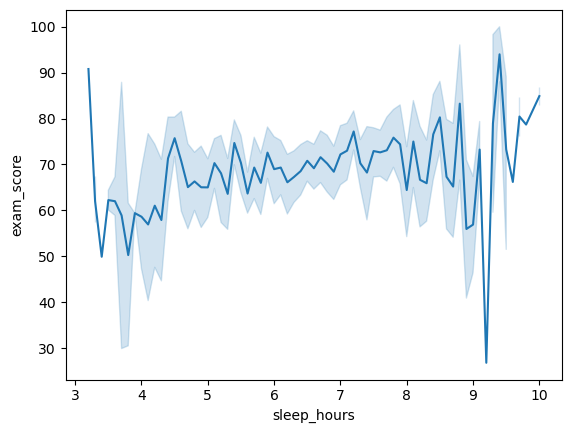

In [28]:
sns.lineplot(data=df, x='sleep_hours', y='exam_score')

<Axes: xlabel='diet_quality', ylabel='exam_score'>

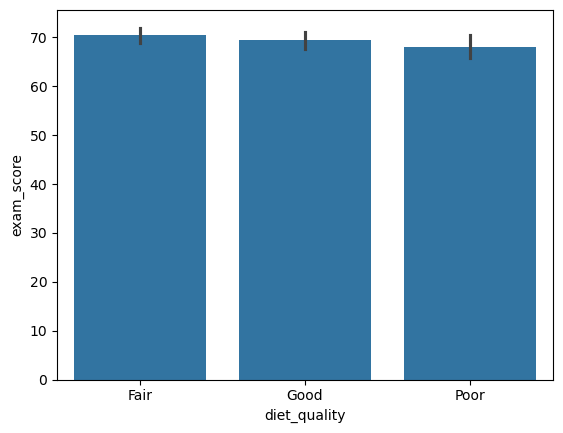

In [29]:
sns.barplot(data=df, x='diet_quality', y='exam_score')

<Axes: xlabel='exercise_frequency', ylabel='exam_score'>

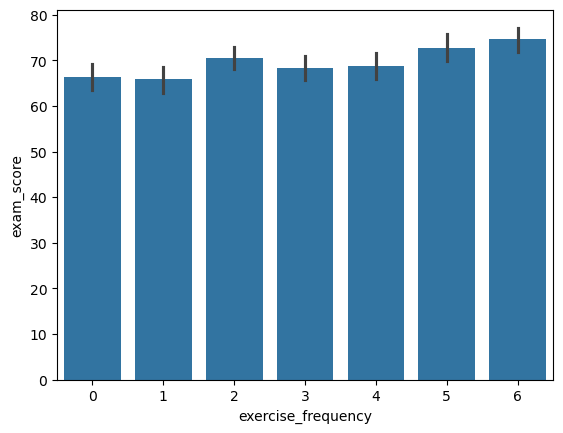

In [30]:
sns.barplot(data=df, x='exercise_frequency', y='exam_score')

<Axes: xlabel='parental_education_level', ylabel='exam_score'>

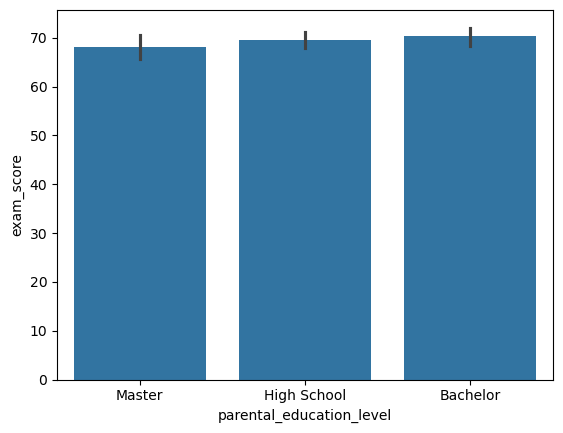

In [31]:
sns.barplot(data=df, x='parental_education_level', y='exam_score')

<Axes: xlabel='internet_quality', ylabel='exam_score'>

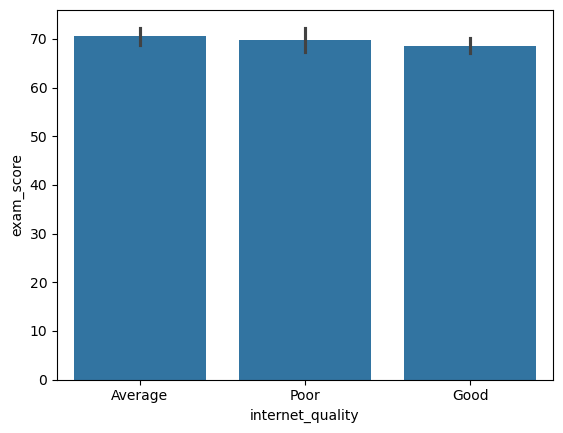

In [32]:
sns.barplot(data=df, x='internet_quality', y='exam_score')

<Axes: xlabel='mental_health_rating', ylabel='exam_score'>

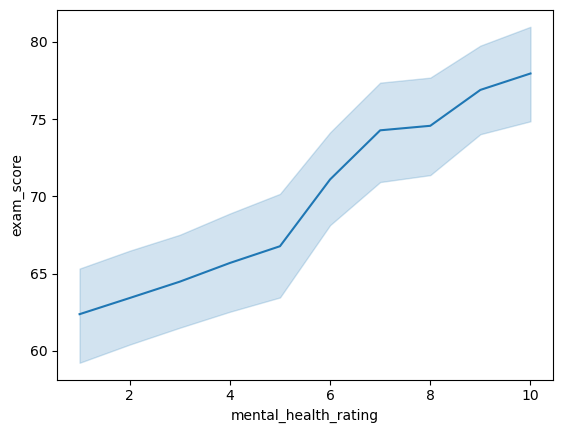

In [33]:
sns.lineplot(data=df, x='mental_health_rating', y='exam_score')

<Axes: xlabel='study_hours_per_day', ylabel='exam_score'>

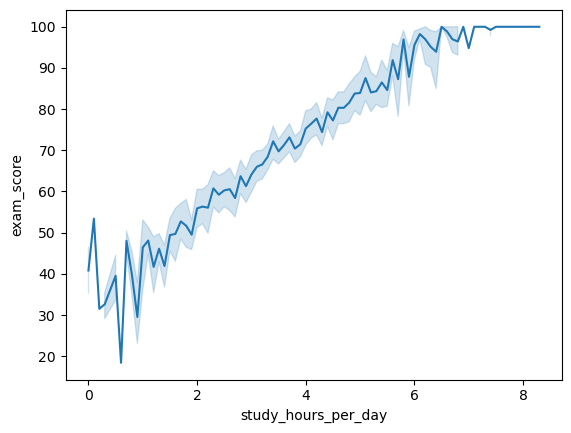

In [34]:
sns.lineplot(data=df, x='study_hours_per_day', y='exam_score')

<Axes: xlabel='extracurricular_participation', ylabel='exam_score'>

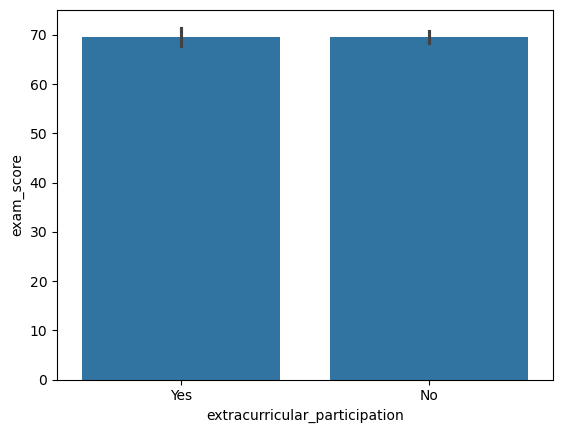

In [35]:
sns.barplot(data=df, x='extracurricular_participation', y='exam_score')

### 3 sigmas

In [36]:
for i in range(0,len(df.select_dtypes(include='number').columns)):
    # Données à analyser
    data = df.select_dtypes(include='number').iloc[:,i]

    # Calcul du Z-score
    z_scores = (data - data.mean()) / data.std()

    # Seuil pour définir un outlier (3 par défaut)
    threshold = 3

    # Filtrage des outliers
    outliers = data[z_scores.abs() > threshold]

    # Affichage des outliers
    print("Outliers détectés :")
    print(outliers)

Outliers détectés :
Series([], Name: age, dtype: int64)
Outliers détectés :
455    8.3
797    8.2
Name: study_hours_per_day, dtype: float64
Outliers détectés :
Series([], Name: attendance_percentage, dtype: float64)
Outliers détectés :
Series([], Name: sleep_hours, dtype: float64)
Outliers détectés :
Series([], Name: exercise_frequency, dtype: int64)
Outliers détectés :
Series([], Name: mental_health_rating, dtype: int64)
Outliers détectés :
265    18.4
Name: exam_score, dtype: float64
Outliers détectés :
32      9.2
145     9.2
735    10.1
Name: Media_hours, dtype: float64


### Correlation

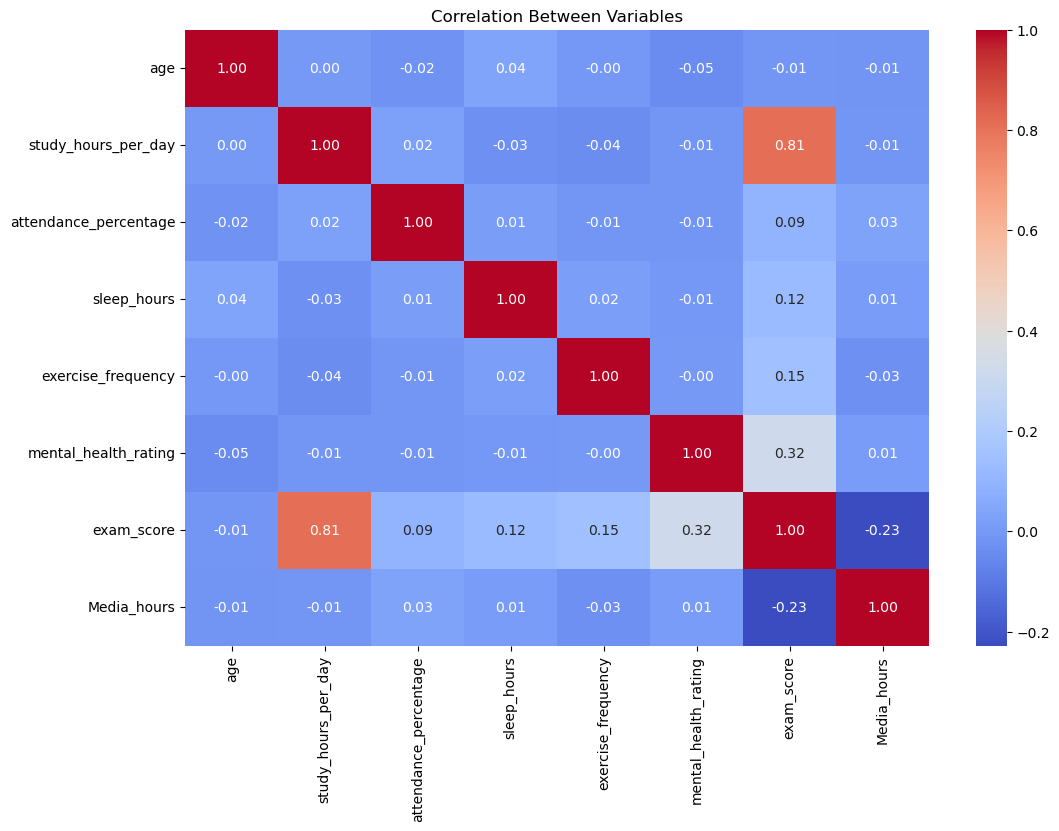

In [37]:
# Correlation between numerical variables only

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True, method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

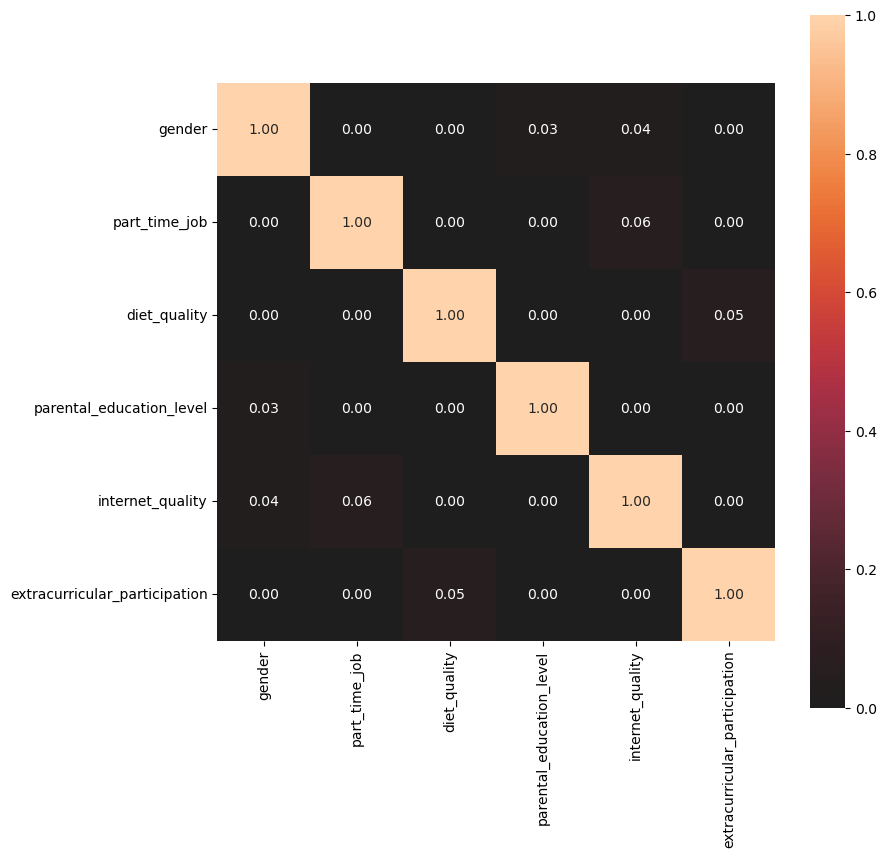

Matrice de Cramér's V avec Dython
{'corr':                                  gender  part_time_job  diet_quality  \
gender                         1.000000       0.000000      0.000000   
part_time_job                  0.000000       1.000000      0.000000   
diet_quality                   0.000000       0.000000      1.000000   
parental_education_level       0.034499       0.000000      0.000000   
internet_quality               0.035484       0.055896      0.000000   
extracurricular_participation  0.000000       0.000000      0.051273   

                               parental_education_level  internet_quality  \
gender                                         0.034499          0.035484   
part_time_job                                  0.000000          0.055896   
diet_quality                                   0.000000          0.000000   
parental_education_level                       1.000000          0.000000   
internet_quality                               0.000000          1.

In [38]:
df_categorical = df.drop(["age", "study_hours_per_day", "Media_hours","attendance_percentage", "sleep_hours","exercise_frequency", "mental_health_rating", "exam_score"], axis=1)
df_categorical

from dython.nominal import associations

# Calcul des corrélations catégoriques avec Cramér's V via dython
corr_matrix = associations(df_categorical, nominal_columns='all')

# Affichage de la matrice de corrélation
print("Matrice de Cramér's V avec Dython")
print(corr_matrix)

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df.select_dtypes(exclude='object').drop('exam_score', axis=1)

# Ajout de la constante (intercept) pour le modèle
X = sm.add_constant(df_vif)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Affichage des résultats
print(vif_data)


                Variable         VIF
0                  const  207.916497
1                    age    1.004289
2    study_hours_per_day    1.002362
3  attendance_percentage    1.002849
4            sleep_hours    1.002994
5     exercise_frequency    1.002285
6   mental_health_rating    1.002514
7            Media_hours    1.002115


### Inferencial analysis

#### Shapiro

In [40]:
# Define hypothesis
# Is there a statistically significant positive relationship between the number of study hours and exam score?
# H0 -> there is no statistically significant positive relationship between the number of study hours and exam score
# H1 -> there is a statistically significant positive relationship between the number of study hours and exam score

# Check if it's a normal distribution sample with Shapiro-Wilk test
from scipy.stats import shapiro
result=df.select_dtypes(include='number').apply(lambda col: shapiro(col.dropna()), result_type='expand')
result
# 0 = statistic, 1 = pvalue

,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,Media_hours
0,9.248605e-01,0.997378,9.826074e-01,0.997267,9.139217e-01,9.381751e-01,9.869195e-01,0.997326
1,6.177718e-22,0.106471,1.502940e-09,0.088776,2.263751e-23,5.841297e-20,8.675028e-08,0.097718


#### Kendall's tau

In [41]:
# Correlation test using kendall's correlation test, pvalue close to 0 = low probability of independance

from scipy.stats import kendalltau
kendalltau(df['exam_score'], df['study_hours_per_day'])

SignificanceResult(statistic=0.6255166146148038, pvalue=1.6652650624619776e-188)

#### Kruskal-Wallis

In [42]:
from scipy.stats import kruskal

kruskal(df['exam_score'], df['study_hours_per_day'])


KruskalResult(statistic=1499.3653731667337, pvalue=0.0)

We can reject H0 and accept H1

### DF

In [43]:
df_ml = df.select_dtypes(exclude='object').drop('age', axis=1)
df_ml.head()

,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,Media_hours
0,0.0,85.0,8.0,6,8,56.2,2.3
1,6.9,97.3,4.6,6,8,100.0,5.1
2,1.4,94.8,8.0,1,1,34.3,4.4
3,1.0,71.0,9.2,4,1,26.8,4.9
4,5.0,90.9,4.9,3,1,66.4,4.9


# ML

### Train test split

In [44]:
target = 'exam_score'

X = df_ml.drop(target, axis=1)
y = df_ml[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Preprocessing

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

# Fill missing values & normalize
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehotencoder', OneHotEncoder(drop='first'))  
])
numerical_transformer = StandardScaler()

In [46]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer (transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Linear regression

##### Score

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
linear_regression_model = lr.fit(X_train, y_train)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print(f"R²train : {r2_train} / R²test : {r2_test}")

R²train : 0.9006192374424123 / R²test : 0.8996428658440797


In [48]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

MAPE_train = mean_absolute_percentage_error(y_train, y_train_predict)
MAPE_test = mean_absolute_percentage_error(y_test, y_test_predict)

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)

print(f"MAPE : {MAPE_train} / {MAPE_test}\nMSE : {MSE_train} / {MSE_test}")

MAPE : 0.0656864186576472 / 0.06811554457468866
MSE : 29.00035876868782 / 25.734489188753354


##### Find coef

In [49]:
feature_importance = pd.DataFrame({
    'feature': preprocessor.get_feature_names_out(),
    'coef': linear_regression_model.coef_
})

In [50]:
# Make it more readable

feature_df = pd.DataFrame(feature_importance)

# Apply string replacement to the 'feature' column
feature_df['feature'] = feature_df['feature'].str.replace('cat__', '', regex=False)
feature_df['feature'] = feature_df['feature'].str.replace('num__', '', regex=False)

feature_df.sort_values('coef', ascending=False, key=abs)

,feature,coef
0,study_hours_per_day,14.151694
4,mental_health_rating,5.545094
5,Media_hours,-4.091630
3,exercise_frequency,2.653611
2,sleep_hours,2.436751
1,attendance_percentage,1.371542


##### Coef visualization

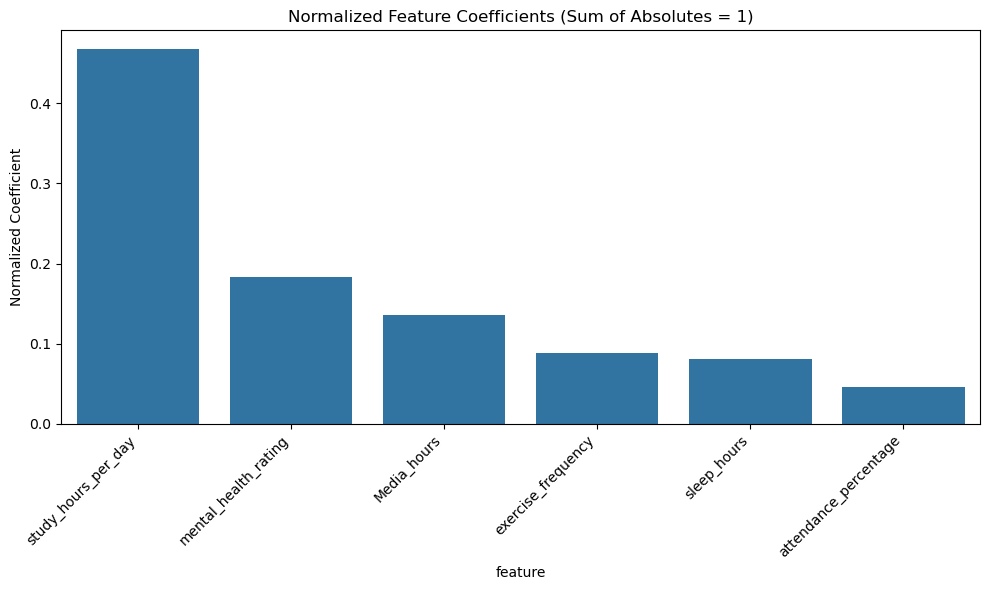

In [51]:
# Absolute value of coef

# Calculate the sum of the absolute values of the coefficients
sum_abs_coef = abs(feature_df['coef']).sum()

# Normalize the coefficients
feature_df['normalized_coef_sum_to_one'] = abs(feature_df['coef'] / sum_abs_coef)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.sort_values('normalized_coef_sum_to_one', ascending=False, key=abs), x='feature', y='normalized_coef_sum_to_one')
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Feature Coefficients (Sum of Absolutes = 1)')
plt.ylabel('Normalized Coefficient')
plt.tight_layout()
plt.show()

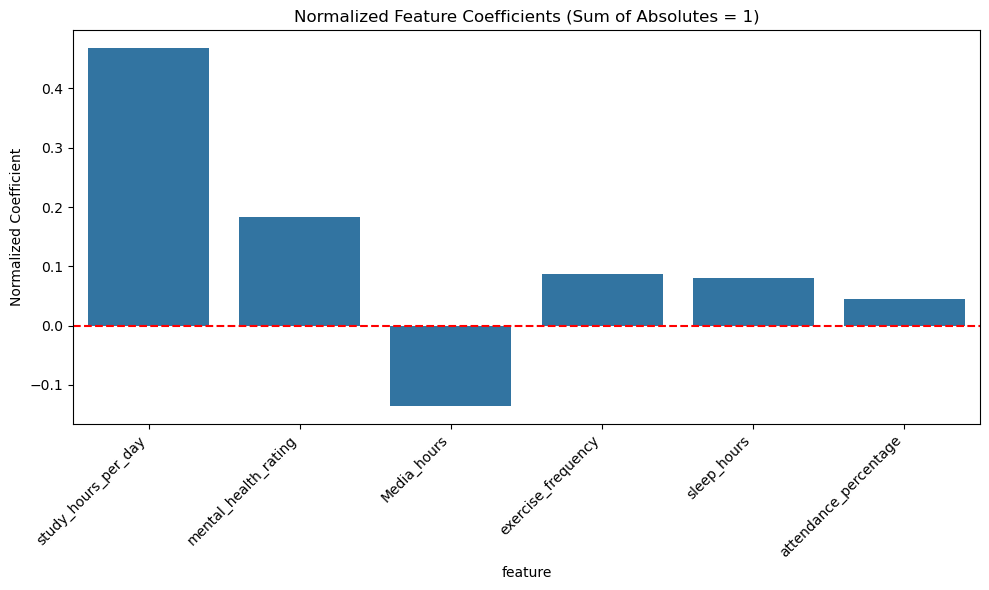

In [52]:
# Real value of coef

# Calculate the sum of the values of the coefficients
sum_abs_coef = abs(feature_df['coef']).sum()

# Normalize the coefficients
feature_df['normalized_coef_sum_to_one'] = feature_df['coef'] / sum_abs_coef

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.sort_values('normalized_coef_sum_to_one', ascending=False, key=abs), x='feature', y='normalized_coef_sum_to_one')
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Feature Coefficients (Sum of Absolutes = 1)')
plt.ylabel('Normalized Coefficient')
plt.tight_layout()
plt.show()

#### Model visualization

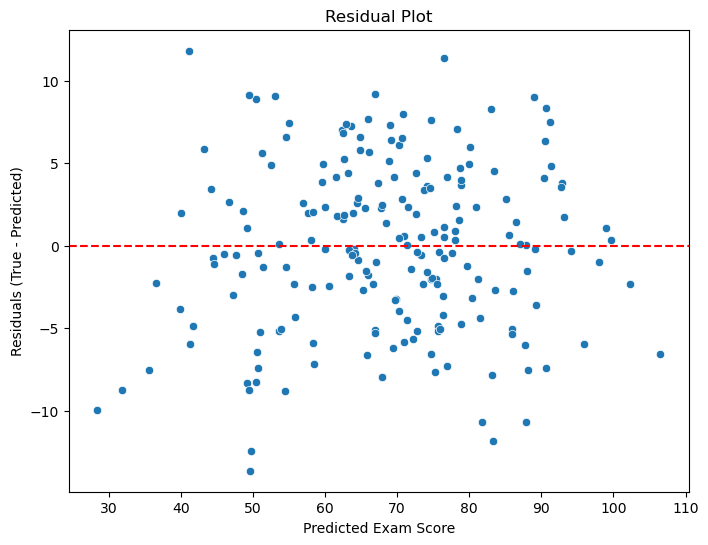

In [53]:
# If randomly scattered around 0 : model's errors are random and have a constant variance, which is a good sign

residuals = y_test - y_test_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_predict, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()

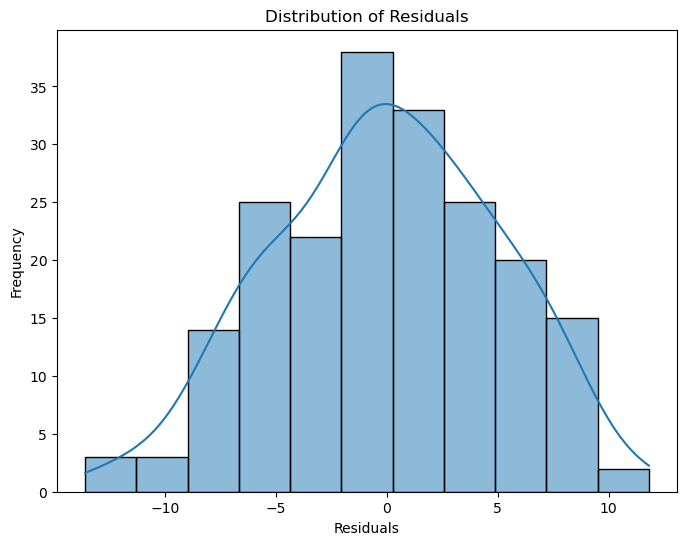

In [54]:
# Another way to view the residuals distribution

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

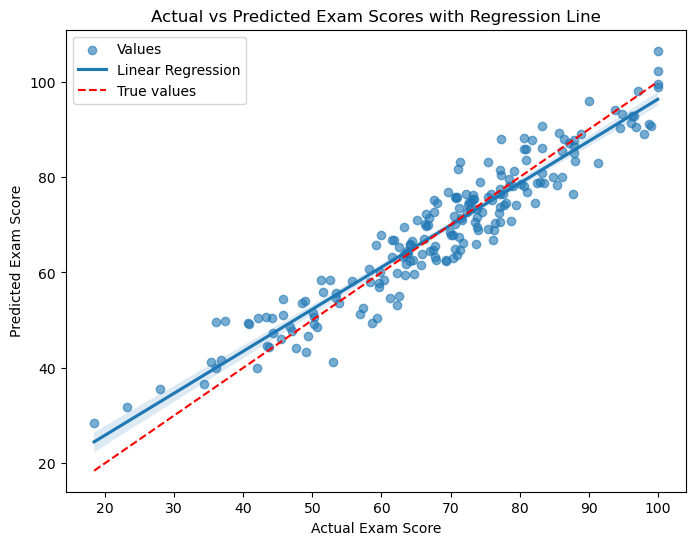

In [55]:
# Red line = true mean, blue line = model, points = values 

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_predict, scatter_kws={'alpha':0.6}, label='Values', line_kws={'label':'Linear Regression'})
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores with Regression Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='True values') # Diagonal line
plt.legend()
plt.show()

### Random forest

#### Scores

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=5)
rfr_model = rfr.fit(X_train, y_train)

y_train_predict_rfr = rfr.predict(X_train)
y_test_predict_rfr = rfr.predict(X_test)

r2_train_rfr = r2_score(y_train, y_train_predict_rfr)
r2_test_rfr = r2_score(y_test, y_test_predict_rfr)

print(f"R²train : {r2_train_rfr} / R²test : {r2_test_rfr}")

MAPE_train_rfr = mean_absolute_percentage_error(y_train, y_train_predict_rfr)
MAPE_test_rfr = mean_absolute_percentage_error(y_test, y_test_predict_rfr)

print(f"MAPE train : {MAPE_train_rfr} / MAPE test : {MAPE_test_rfr}")

R²train : 0.890322446477448 / R²test : 0.8209557529202031
MAPE train : 0.07124809746565149 / MAPE test : 0.0923182252916811


#### Coef

In [57]:
feature_importance_rfr = pd.DataFrame({
    'feature': preprocessor.get_feature_names_out(),
    'coef': rfr_model.feature_importances_
})

# Make it more readable

feature_df_rfr = pd.DataFrame(feature_importance_rfr)

# Apply string replacement to the 'feature' column
feature_df_rfr['feature'] = feature_df_rfr['feature'].str.replace('cat__', '', regex=False)
feature_df_rfr['feature'] = feature_df_rfr['feature'].str.replace('num__', '', regex=False)

feature_df_rfr.sort_values('coef', ascending=False, key=abs)

,feature,coef
0,study_hours_per_day,0.805322
4,mental_health_rating,0.105352
5,Media_hours,0.053951
2,sleep_hours,0.017813
3,exercise_frequency,0.012786
1,attendance_percentage,0.004777


#### Coef visualization

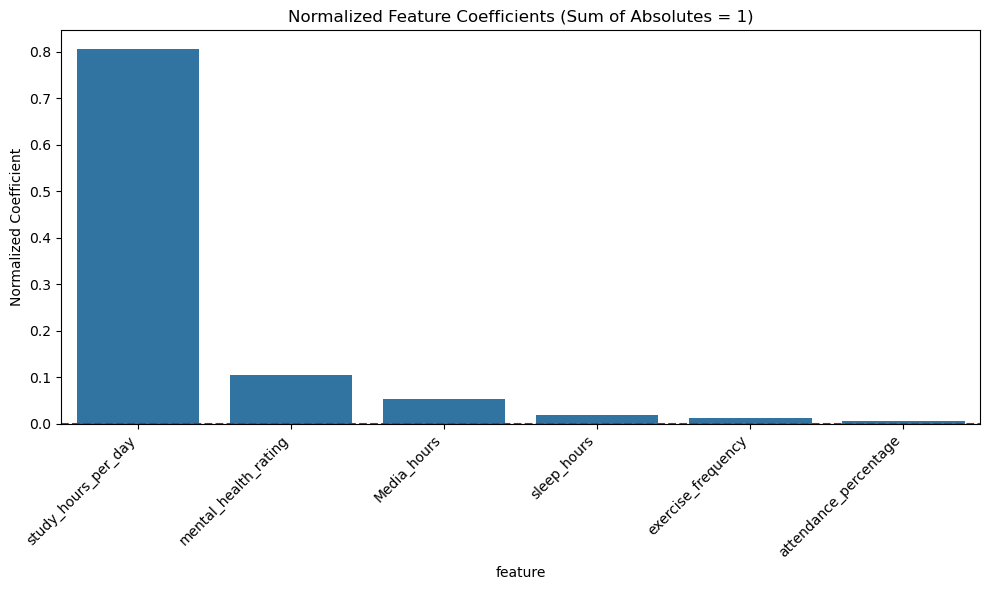

In [58]:
# Real value of coef

# Calculate the sum of the values of the coefficients
sum_abs_coef = abs(feature_df_rfr['coef']).sum()

# Normalize the coefficients
feature_df_rfr['normalized_coef_sum_to_one'] = feature_df_rfr['coef'] / sum_abs_coef

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df_rfr.sort_values('normalized_coef_sum_to_one', ascending=False, key=abs), x='feature', y='normalized_coef_sum_to_one')
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Feature Coefficients (Sum of Absolutes = 1)')
plt.ylabel('Normalized Coefficient')
plt.tight_layout()
plt.show()

#### Model visualization

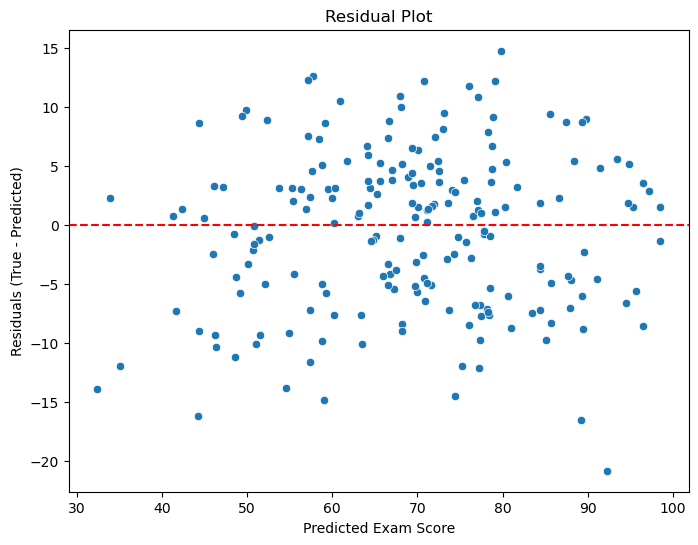

In [59]:
# If randomly scattered around 0 : model's errors are random and have a constant variance, which is a good sign

residuals_rfr = y_test - y_test_predict_rfr

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_predict_rfr, y=residuals_rfr)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()

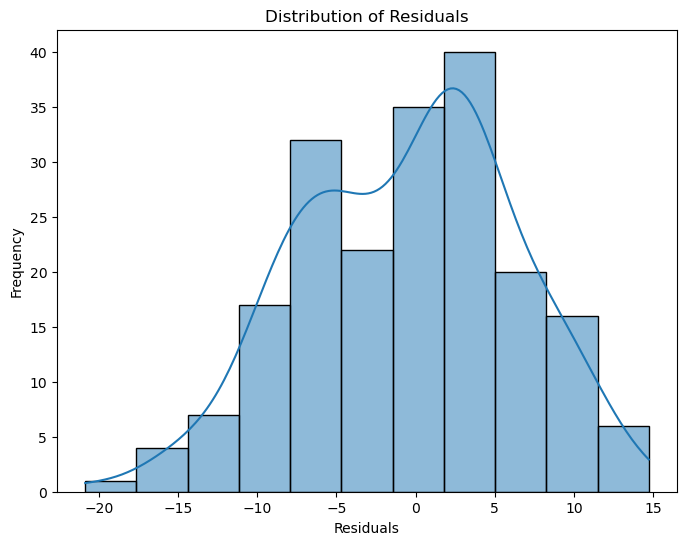

In [60]:
# Another way to view the residuals distribution

plt.figure(figsize=(8, 6))
sns.histplot(residuals_rfr, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

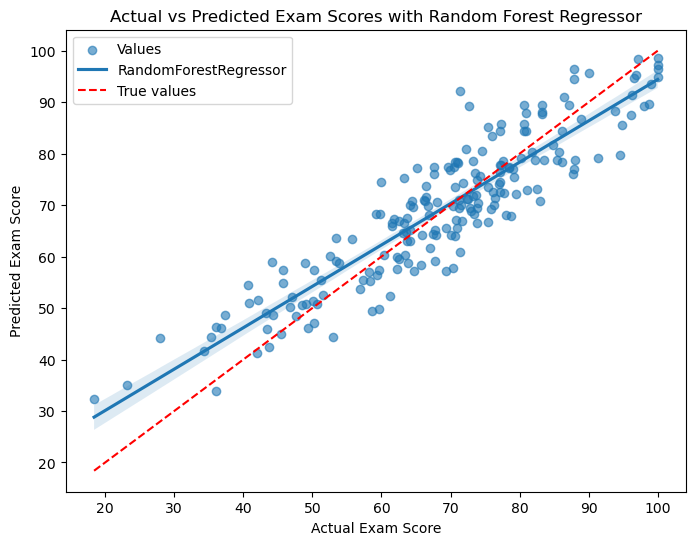

In [61]:
# Red line = model, blue line = true values, points = values

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_predict_rfr, scatter_kws={'alpha':0.6}, label='Values', line_kws={'label':'RandomForestRegressor'})
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores with Random Forest Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='True values') # Diagonal line
plt.legend()
plt.show()

### Lasso

#### Scores

In [62]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01)
las_model = las.fit(X_train, y_train)

y_train_predict_las = las.predict(X_train)
y_test_predict_las = las.predict(X_test)

r2_train_las = r2_score(y_train, y_train_predict_las)
r2_test_las = r2_score(y_test, y_test_predict_las)

print(f"R²train : {r2_train_las} / R²test : {r2_test_las}")

MAPE_train_las = mean_absolute_percentage_error(y_train, y_train_predict_las)
MAPE_test_las = mean_absolute_percentage_error(y_test, y_test_predict_las)

print(f"MAPE train : {MAPE_train_las} / MAPE test : {MAPE_test_las}")




R²train : 0.9006172178567201 / R²test : 0.8995488683869993
MAPE train : 0.06572257252339227 / MAPE test : 0.06818235452709881


#### Coef

In [63]:
feature_importance_las = pd.DataFrame({
    'feature': preprocessor.get_feature_names_out(),
    'coef': las_model.coef_
})

# Make it more readable

feature_df_las = pd.DataFrame(feature_importance_las)

# Apply string replacement to the 'feature' column
feature_df_las['feature'] = feature_df_las['feature'].str.replace('cat__', '', regex=False)
feature_df_las['feature'] = feature_df_las['feature'].str.replace('num__', '', regex=False)

feature_df_las.sort_values('coef', ascending=False, key=abs)

,feature,coef
0,study_hours_per_day,14.141567
4,mental_health_rating,5.535270
5,Media_hours,-4.081768
3,exercise_frequency,2.643758
2,sleep_hours,2.427241
1,attendance_percentage,1.361779


#### Coef visualization

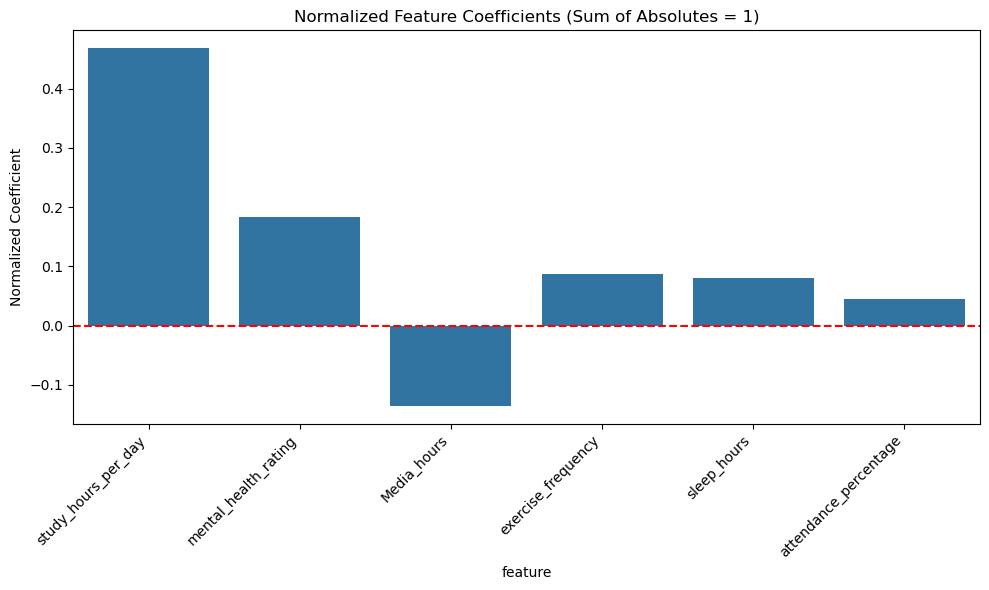

In [64]:
# Real value of coef

# Calculate the sum of the values of the coefficients
sum_abs_coef = abs(feature_df_las['coef']).sum()

# Normalize the coefficients
feature_df_las['normalized_coef_sum_to_one'] = feature_df_las['coef'] / sum_abs_coef

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df_las.sort_values('normalized_coef_sum_to_one', ascending=False, key=abs), x='feature', y='normalized_coef_sum_to_one')
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Feature Coefficients (Sum of Absolutes = 1)')
plt.ylabel('Normalized Coefficient')
plt.tight_layout()
plt.show()

#### Model visualization

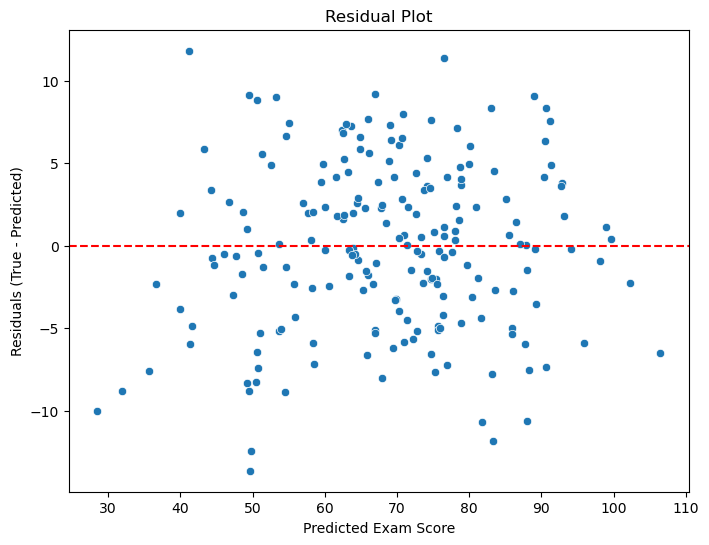

In [65]:
# If randomly scattered around 0 : model's errors are random and have a constant variance, which is a good sign

residuals_las = y_test - y_test_predict_las

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_predict_las, y=residuals_las)
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residual Plot')
plt.show()

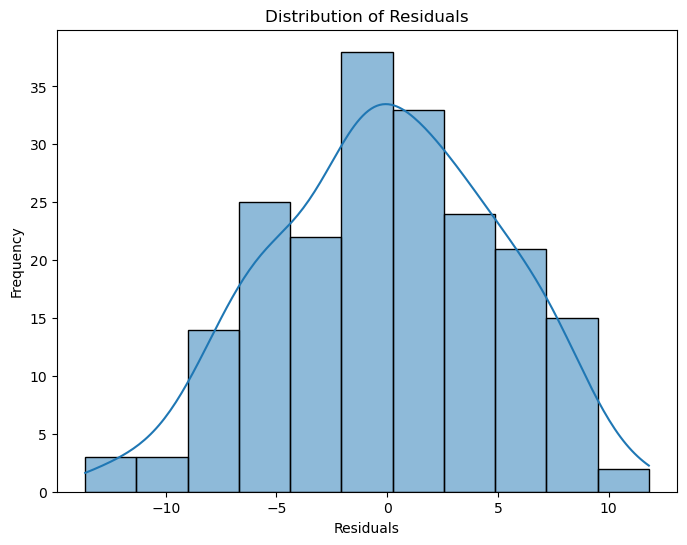

In [66]:
# Another way to view the residuals distribution

plt.figure(figsize=(8, 6))
sns.histplot(residuals_las, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

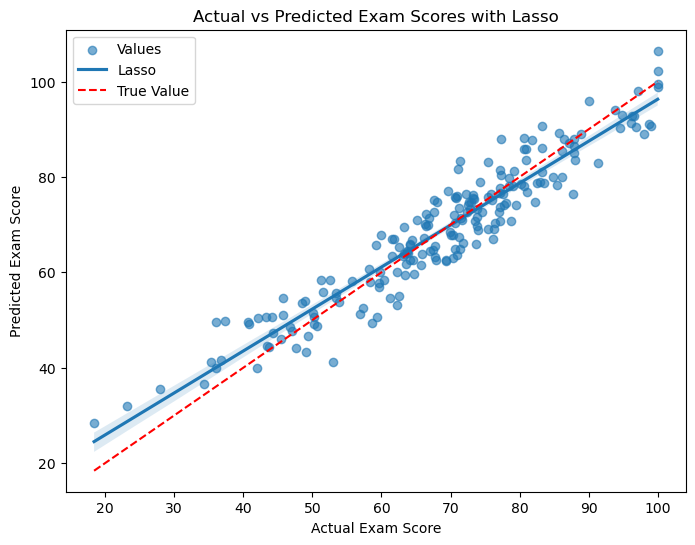

In [67]:
# Red line = model, blue line = true mean, points = values

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_predict_las, scatter_kws={'alpha':0.6}, label='Values', line_kws={'label':'Lasso'})
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores with Lasso')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='True Value') # Diagonal line
plt.legend()
plt.show()

### ElasticNet Regression

#### Scores

In [68]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = 0.01)
en_model = en.fit(X_train, y_train)

y_train_predict_en = en_model.predict(X_train)
y_test_predict_en = en_model.predict(X_test)

r2_train_en = r2_score(y_train, y_train_predict_en)
r2_test_en = r2_score(y_test, y_test_predict_en)

print(f"R²train : {r2_train_en} / R²test : {r2_test_en}")

MAPE_train_en = mean_absolute_percentage_error(y_train, y_train_predict_en)
MAPE_test_en = mean_absolute_percentage_error(y_test, y_test_predict_en)

print(f"MAPE train : {MAPE_train_en} / MAPE test : {MAPE_test_en}")

R²train : 0.9005913506896768 / R²test : 0.8993674215087961
MAPE train : 0.06584343170687179 / MAPE test : 0.0684077842378419


#### Coef

In [69]:
feature_importance_en = pd.DataFrame({
    'feature': preprocessor.get_feature_names_out(),
    'coef': en_model.coef_
})

# Make it more readable

feature_df_en = pd.DataFrame(feature_importance_en)

# Apply string replacement to the 'feature' column
feature_df_en['feature'] = feature_df_en['feature'].str.replace('cat__', '', regex=False)
feature_df_en['feature'] = feature_df_en['feature'].str.replace('num__', '', regex=False)

feature_df_en.sort_values('coef', ascending=False, key=abs)

,feature,coef
0,study_hours_per_day,14.075991
4,mental_health_rating,5.512963
5,Media_hours,-4.067399
3,exercise_frequency,2.634841
2,sleep_hours,2.418391
1,attendance_percentage,1.361681


#### Coef visualization

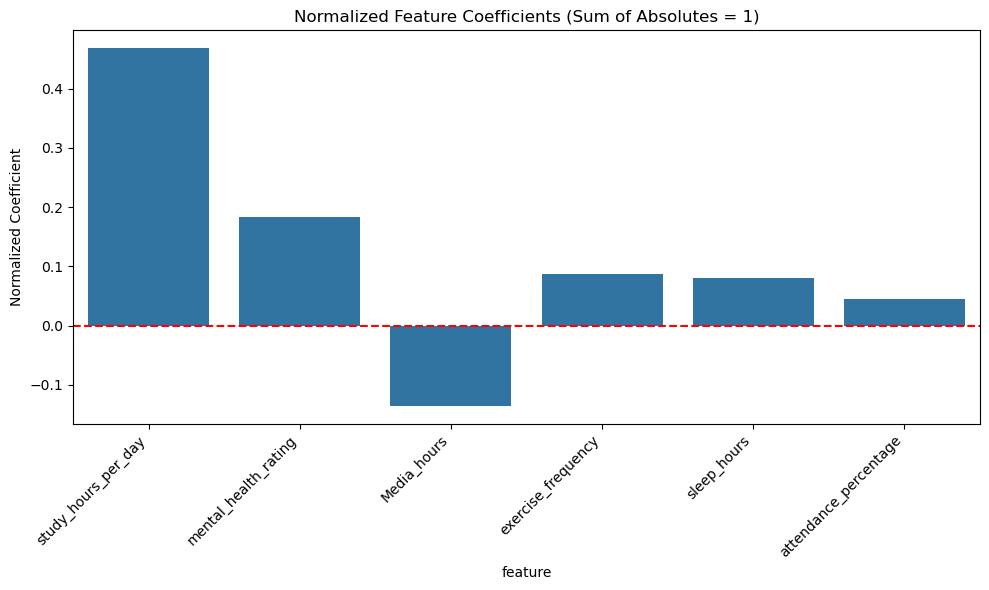

In [70]:
# Real value of coef

# Calculate the sum of the values of the coefficients
sum_abs_coef = abs(feature_df_en['coef']).sum()

# Normalize the coefficients
feature_df_en['normalized_coef_sum_to_one'] = feature_df_en['coef'] / sum_abs_coef

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df_en.sort_values('normalized_coef_sum_to_one', ascending=False, key=abs), x='feature', y='normalized_coef_sum_to_one')
plt.axhline(y=0, color='r', linestyle='--')  # Line at zero for reference
plt.xticks(rotation=45, ha='right')
plt.title('Normalized Feature Coefficients (Sum of Absolutes = 1)')
plt.ylabel('Normalized Coefficient')
plt.tight_layout()
plt.show()

#### Model visualization

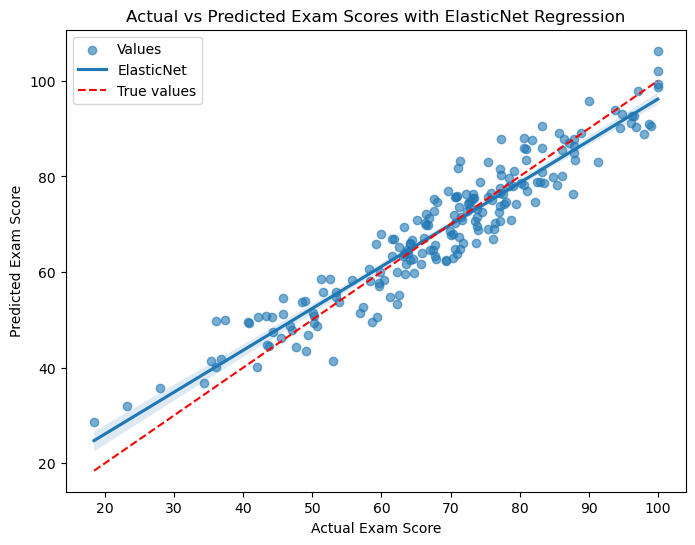

In [71]:
# Red line = model, blue line = true mean, points = values

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_predict_en, scatter_kws={'alpha':0.6}, label='Values', line_kws={'label':'ElasticNet'})
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores with ElasticNet Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='True values') # Diagonal line
plt.legend()
plt.show()

### Model comparison

In [72]:
print(f"Linear Regression :\nR²train : {r2_train} / R²test : {r2_test}\nMAE train : {MAPE_train} / MAPE test : {MAPE_test}")
print(f"Random Forest Regressor :\nR²train : {r2_train_rfr} / R²test : {r2_test_rfr}\nMAPE train : {MAPE_train_rfr} / MAPE test : {MAPE_test_rfr}")
print(f"Lasso : \nR²train : {r2_train_las} / R²test : {r2_test_las}\nMAPE train : {MAPE_train_las} / MAPE test : {MAPE_test_las}")
print(f"ElasticNet : \nR²train : {r2_train_en} / R²test : {r2_test_en}\nMAPE train : {MAPE_train_en} / MAPE test : {MAPE_test_en}")

Linear Regression :
R²train : 0.9006192374424123 / R²test : 0.8996428658440797
MAE train : 0.0656864186576472 / MAPE test : 0.06811554457468866
Random Forest Regressor :
R²train : 0.890322446477448 / R²test : 0.8209557529202031
MAPE train : 0.07124809746565149 / MAPE test : 0.0923182252916811
Lasso : 
R²train : 0.9006172178567201 / R²test : 0.8995488683869993
MAPE train : 0.06572257252339227 / MAPE test : 0.06818235452709881
ElasticNet : 
R²train : 0.9005913506896768 / R²test : 0.8993674215087961
MAPE train : 0.06584343170687179 / MAPE test : 0.0684077842378419


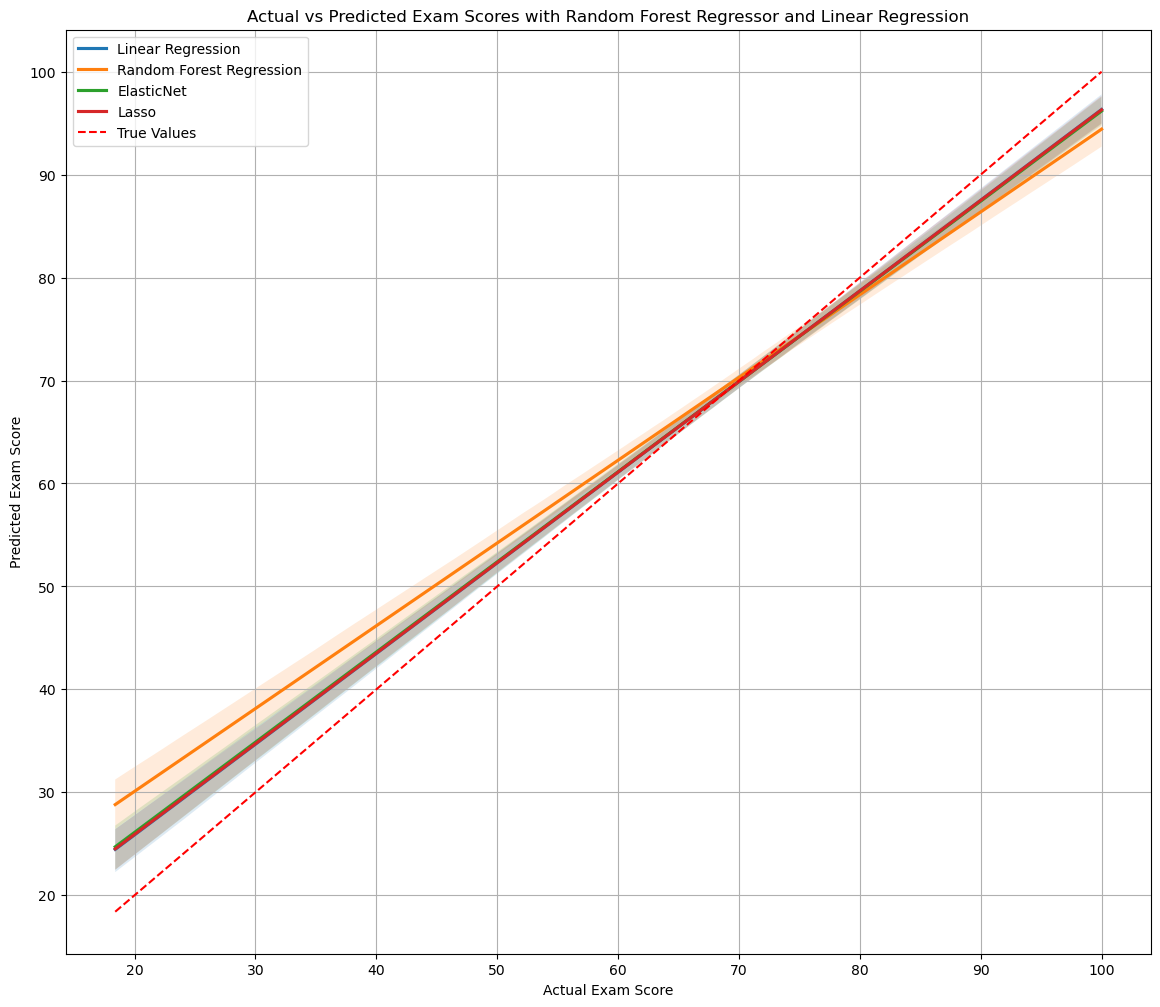

In [73]:
# red = true values, blue = linear reg, orange = random forest

plt.figure(figsize=(14, 12))
sns.regplot(x=y_test, y=y_test_predict, scatter=False, label='Linear Regression')
sns.regplot(x=y_test, y=y_test_predict_rfr, scatter=False, label= 'Random Forest Regression')
sns.regplot(x=y_test, y=y_test_predict_en, scatter=False, label='ElasticNet') 
sns.regplot(x=y_test, y=y_test_predict_las, scatter=False, label='Lasso')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores with Random Forest Regressor and Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='True Values') # Diagonal line
plt.legend()
plt.grid(True)
plt.show()

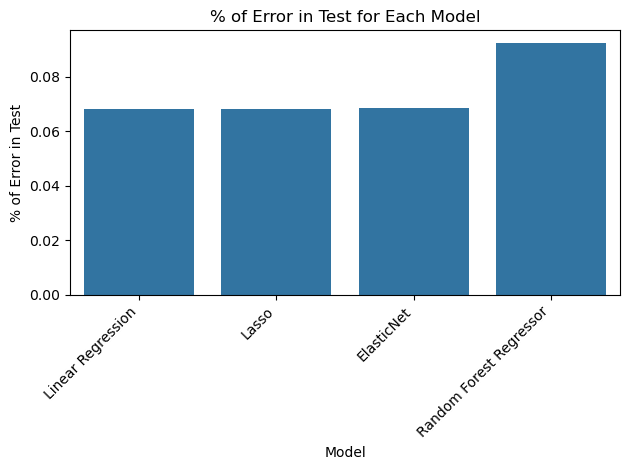

In [74]:
mape_test_values = {
    'Linear Regression': MAPE_test,
    'Random Forest Regressor': MAPE_test_rfr,
    'Lasso': MAPE_test_las,
    'ElasticNet': MAPE_test_en
}

# Extract the MAPE values and model names
mape_values = list(mape_test_values.values())
model_names = list(mape_test_values.keys())

# Create a Pandas DataFrame for easier plotting with Seaborn
mape_df = pd.DataFrame(list(mape_test_values.items()), columns=['Model', 'MAPE Test'])

# Create the barplot
sns.barplot(x='Model', y='MAPE Test', data=mape_df.sort_values(by='MAPE Test', ascending=True))

# Add labels and title
plt.xlabel("Model")
plt.ylabel("% of Error in Test")
plt.title("% of Error in Test for Each Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# App

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from ipywidgets import interact, widgets
from IPython.display import display
from tkinter import Tk, Label, Entry, Button, StringVar, OptionMenu, Toplevel, Text, END, messagebox

### Manual input

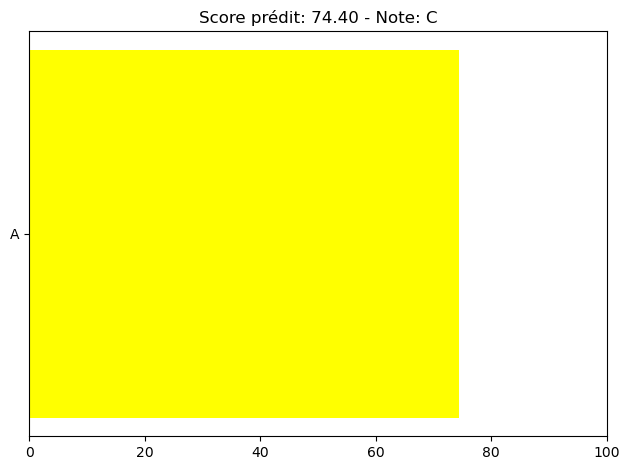

In [5]:
# Données (exemple)
csv_url = "https://raw.githubusercontent.com/Ter0rra/blank-app/6813973fbe231ac40da9129ab94dca649ee09702/student_habits_performance.csv"
df_student = pd.read_csv(csv_url)
df_student = df_student.drop(['student_id'], axis=1)
df_student['media_hours'] = df_student['netflix_hours'] + df_student['social_media_hours']
df_student = df_student.reindex(['age', 'gender', 'study_hours_per_day', 'social_media_hours','netflix_hours', 'media_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation','exam_score'], axis=1)
df_num_value = df_student.select_dtypes(include=['number'])
df_student_ml = df_num_value.drop(['age', 'social_media_hours', 'netflix_hours'], axis=1)

# Séparation des variables
X = df_student_ml.drop('exam_score', axis=1)
y = df_student_ml['exam_score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=np.number).columns.to_list()
categorical_features = X.select_dtypes(include='object').columns.to_list()

# Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

model = LinearRegression()
model.fit(x_train_processed, y_train)

# Pour suggestions dynamiques
original_model = model

# Grade

def get_grade_color(score):
    if score >= 90: return 'A', 'green'
    elif score >= 80: return 'B', 'lightgreen'
    elif score >= 70: return 'C', 'yellow'
    elif score >= 60: return 'D', 'orange'
    elif score >= 50: return 'E', 'orangered'
    else: return 'F', 'red'

# Suggestions selon entrées numériques

def get_dynamic_suggestions(df_input):
    current_score = model.predict(preprocessor.transform(df_input))[0]
    improvements = []
    for col in numeric_features:
        better_value = df_input[col].values[0]
        test_up = df_input.copy()
        test_up[col] = better_value + 1
        score_up = model.predict(preprocessor.transform(test_up))[0]

        test_down = df_input.copy()
        test_down[col] = better_value - 1
        score_down = model.predict(preprocessor.transform(test_down))[0]

        score_up = min(score_up, 100)
        score_down = min(score_down, 100)

        delta_up = score_up - current_score
        delta_down = score_down - current_score

        best_delta = max(delta_up, delta_down)
        if best_delta > 0:
            direction = "augmenter" if delta_up > delta_down else "réduire"
            improvements.append((col, direction, best_delta))

    improvements.sort(key=lambda x: x[2], reverse=True)
    return improvements[:3]

# GUI
class StudentApp:
    def __init__(self, root):
        self.entries = {}
        self.dropdown_vars = {}
        self.root = root
        root.title("Prédicteur de score avec recommandations dynamiques")

        Label(root, text="Nom étudiant :").grid(row=0, column=0)
        self.name_entry = Entry(root)
        self.name_entry.grid(row=0, column=1)

        self.input_columns = X.columns

        for i, col in enumerate(self.input_columns):
            Label(root, text=col).grid(row=i+1, column=0)
            if col in categorical_features:
                values = df_student[col].dropna().unique()
                var = StringVar(value=values[0])
                dropdown = OptionMenu(root, var, *values)
                dropdown.grid(row=i+1, column=1)
                self.entries[col] = var
            else:
                entry = Entry(root)
                entry.grid(row=i+1, column=1)
                self.entries[col] = entry

        Button(root, text="Prédire", command=self.predict).grid(row=len(self.input_columns)+1, column=0, columnspan=2)

    def predict(self):
        name = self.name_entry.get()
        input_data = []

        try:
            for col in self.input_columns:
                val = self.entries[col].get()
                val = float(val) if col in numeric_features else val
                input_data.append(val)

            df_input = pd.DataFrame([input_data], columns=self.input_columns)
            df_processed = preprocessor.transform(df_input)

            score = model.predict(df_processed)[0]
            score = min(score, 100)
            grade, color = get_grade_color(score)

            fig, ax = plt.subplots()
            ax.barh([name], [score], color=color)
            ax.set_xlim(0, 100)
            ax.set_title(f"Score prédit: {score:.2f} - Note: {grade}")
            plt.tight_layout()
            plt.show()

            if score >= 90:
                top = Toplevel(self.root)
                top.title("Félicitations !")
                Label(top, text="🎉 Continue comme ça, c'est parfait ! 🎉", fg="green", font=("Helvetica", 12, "bold")).pack(padx=10, pady=10)
            else:
                suggestions = get_dynamic_suggestions(df_input)
                top = Toplevel(self.root)
                top.title("Suggestions d'amélioration")
                Label(top, text="Suggestions pour améliorer votre score :").pack()
                text_box = Text(top, height=6, width=60)
                text_box.pack()
                for var, direction, gain in suggestions:
                    text_box.insert(END, f"- {direction} {var} → gain estimé de {gain:.2f} points\n")
                text_box.config(state='disabled')

        except Exception as e:
            messagebox.showerror("Erreur", str(e))

# Lancer l'appli
root = Tk()
app = StudentApp(root)
root.mainloop()


### Slide input

In [ ]:
csv_url = "https://raw.githubusercontent.com/Ter0rra/blank-app/6813973fbe231ac40da9129ab94dca649ee09702/student_habits_performance.csv"
df_student = pd.read_csv(csv_url)
df_student = df_student.drop(['student_id'], axis=1)
df_student['media_hours'] = df_student['netflix_hours'] + df_student['social_media_hours']
df_student = df_student.reindex(['age', 'gender', 'study_hours_per_day', 'social_media_hours','netflix_hours', 'media_hours','part_time_job','attendance_percentage','sleep_hours','diet_quality','exercise_frequency','parental_education_level','internet_quality','mental_health_rating','extracurricular_participation','exam_score'], axis=1)
df_num_value = df_student.select_dtypes(include=['number'])
df_student_ml = df_num_value.drop(['age', 'social_media_hours', 'netflix_hours'], axis=1)

target = 'exam_score'
X = df_student_ml.drop(columns=[target])
y = df_student_ml[target]

numeric_features = X.select_dtypes(include=np.number).columns.to_list()
categorical_features = X.select_dtypes(include='object').columns.to_list()

# Préprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

model = LinearRegression()
model.fit(X_processed, y)

def get_grade_color(score):
    if score >= 90: return 'A', 'green'
    elif score >= 80: return 'B', 'lightgreen'
    elif score >= 70: return 'C', 'yellow'
    elif score >= 60: return 'D', 'orange'
    elif score >= 50: return 'E', 'orangered'
    else: return 'F', 'red'

def get_dynamic_suggestions(df_input):
    current_score = model.predict(preprocessor.transform(df_input))[0]
    improvements = []
    for col in numeric_features:
        better_value = df_input[col].values[0]
        test_up = df_input.copy()
        test_up[col] = better_value + 1
        score_up = model.predict(preprocessor.transform(test_up))[0]

        test_down = df_input.copy()
        test_down[col] = better_value - 1
        score_down = model.predict(preprocessor.transform(test_down))[0]

        score_up = min(score_up, 100)
        score_down = min(score_down, 100)

        delta_up = score_up - current_score
        delta_down = score_down - current_score

        best_delta = max(delta_up, delta_down)
        if best_delta > 0:
            direction = "augmenter" if delta_up > delta_down else "réduire"
            improvements.append((col, direction, best_delta))

    improvements.sort(key=lambda x: x[2], reverse=True)
    return improvements[:3]

def predict_score(**kwargs):
    input_df = pd.DataFrame([kwargs])
    X_input = preprocessor.transform(input_df)
    score = model.predict(X_input)[0]
    score = min(score, 100)
    grade, color = get_grade_color(score)

    plt.figure(figsize=(6, 1.5))
    plt.barh(["Score"], [score], color=color)
    plt.xlim(0, 100)
    plt.title(f"Score: {score:.2f} - Note: {grade}")
    plt.show()

    if score >= 90:
        print("🎉 Félicitations ! Continue comme ça, c'est parfait ! 🎉")
    else:
        suggestions = get_dynamic_suggestions(input_df)
        print("Suggestions pour améliorer votre score :")
        for var, direction, gain in suggestions:
            print(f"- {direction} {var} → gain estimé de {gain:.2f} points")

# Génération dynamique des widgets
widget_dict = {}
for col in X.columns:
    if col in numeric_features:
        min_val = float(df_student_ml[col].min())
        max_val = float(df_student_ml[col].max())
        mean_val = float(df_student_ml[col].mean())
        widget_dict[col] = widgets.FloatSlider(value=mean_val, min=min_val, max=max_val, step=0.1, description=col)
    else:
        options = df_student_ml[col].dropna().unique().tolist()
        widget_dict[col] = widgets.Dropdown(options=options, description=col)

interact(predict_score, **widget_dict)

interactive(children=(FloatSlider(value=3.5501000000000005, description='study_hours_per_day', max=8.3), Float…

<function __main__.predict_score(**kwargs)>